<a href="https://colab.research.google.com/github/lahiruC22/computational-neuroscience/blob/main/codelab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computational Neuroscience - University of Washington - Quiz 01

---

**The aim of the quiz:**
*   Understand how to calculate a spiked-triggered average
*   To identify the usage of spiked-triggered average in determining the relevant features within a stimulus.  

**Dataset:**  
Data set is an experimentally recorded set of spikes recorded from the famous H1 motion-sensitive neuron of the fly [Calliphora vicina](https://encrypted-tbn0.gstatic.com/licensed-image?q=tbn:ANd9GcTF42TmSzN6xcJ-JevfBbQvaxYqwj5_PnomHL4ZqqzOneFH3X9NqU6SRfzuYPK1zjJaIikwPOGwflQ5bSU) from the lab of Dr Robert de Ruyter van Steveninck.



In [1]:
"""Code to compute spike-triggered average."""
#importing the necessary libraries
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pickle

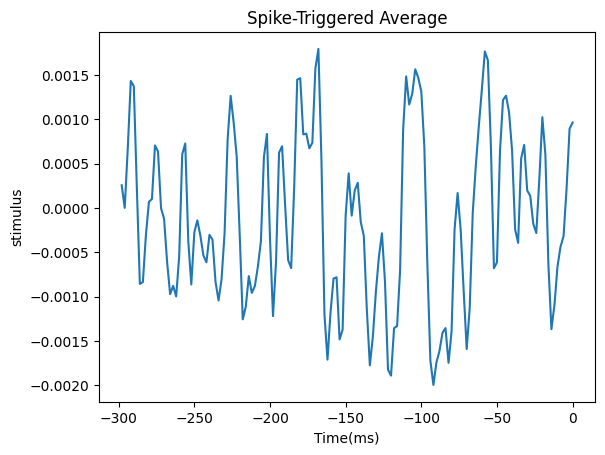

In [5]:
FILENAME = '/content/drive/MyDrive/computational-neuro-quiz/c1p8.pickle'
with open(FILENAME,'rb') as f:
  data = pickle.load(f)

stim = data['stim']
rho = data['rho']

sampling_periods = 2 # in ms
num_timesteps = 150

sta = compute_sta(stim, rho, num_timesteps)

time = (np.arange(-num_timesteps,0)+1) * sampling_periods

plt.plot(time,sta)
plt.xlabel('Time(ms)')
plt.ylabel('stimulus')
plt.title('Spike-Triggered Average')

plt.show()

In [2]:
def compute_sta(stim, rho, num_timesteps):
  """Compute the spike-triggered average from a stimulus and spike-train.

  Args:
    stim: stimulus time-series
    rho: spike-train time-series
    num_timesteps: how many timesteps to use in STA

  Returns:
    spike-triggered average for num_timesteps timesteps before spike"""

  sta = np.zeros((num_timesteps))

  # This command finds the indices of all of the spikes that occur
  # after 300ms into the recording
  spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps

  # Note that you should not count spikes that occur
  # before 300ms into the recording
  # count the number of spikes
  num_spikes = len(spike_times)

  # Compute the spike-triggered average of the spikes found.
  # To do this, compute the average of all of the vectors
  # starting 300 ms (exclusive) before a spike and ending at the time of
  # the event (inclusive). Each of these vectors defines a list of samples
  # that is contained within a window of 300 ms before each spike.
  # The average of these vectors should be completed in an element-wise manner

  for spike in spike_times: #loop over all spikes
    sta += stim[spike - num_timesteps : spike] #add the stimulus windows before each spike
    sta /= num_spikes # divide by the number of spikes to get the average
  return sta